In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/consolidated_data/training_dataset.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df = pd.get_dummies(df, columns=['state'])

In [3]:
df.head()

,date,cases_new,cases_recovered,cases_active,cases_unvax,cases_pvax,cases_fvax,cases_0_4,cases_5_11,cases_12_17,...,state_Perak,state_Perlis,state_Pulau Pinang,state_Sabah,state_Sarawak,state_Selangor,state_Terengganu,state_W.P. Kuala Lumpur,state_W.P. Labuan,state_W.P. Putrajaya
0,2020-01-25,4,0,4,4,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2020-01-25,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2020-01-25,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2020-01-25,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['cases_new'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}' )
print(f'Critical Values: {result[4]}')

ADF Statistic: -2.405630620507177
p-value: 0.14015351027001127
Critical Values: {'1%': -3.4306145729682744, '5%': -2.861656933183008, '10%': -2.5668322401244907}


In [5]:
split_index = int(0.8 * len(df))
df.drop(columns=['cases_new'],inplace=True)
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

print("Training data shape:", train_data.shape)

print("Testing data shape:", test_data.shape, test_data)

Training data shape: (19814, 42)
Testing data shape: (4954, 42)              date  cases_recovered  cases_active  cases_unvax  cases_pvax  \
19814  2023-06-16               45           782            4           1   
19815  2023-06-16                3            93            1           0   
19816  2023-06-16               39           605            2           0   
19817  2023-06-16                5          3791            2           0   
19818  2023-06-16               56           686           10           0   
...           ...              ...           ...          ...         ...   
24763  2024-04-20                8            37            4           0   
24764  2024-04-20                0           299            0           0   
24765  2024-04-20                5           585            6           0   
24766  2024-04-20                0            28            0           0   
24767  2024-04-20                0           240            0           0   

       case

---

In [6]:
from statsmodels.tsa.arima.model import ARIMA
train_data = train_data.set_index('date')
test_data = test_data.set_index('date')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19814 entries, 2020-01-25 to 2023-06-16
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cases_recovered            19814 non-null  int64  
 1   cases_active               19814 non-null  int64  
 2   cases_unvax                19814 non-null  int64  
 3   cases_pvax                 19814 non-null  int64  
 4   cases_fvax                 19814 non-null  int64  
 5   cases_0_4                  19814 non-null  int64  
 6   cases_5_11                 19814 non-null  int64  
 7   cases_12_17                19814 non-null  int64  
 8   cases_18_29                19814 non-null  int64  
 9   cases_30_39                19814 non-null  int64  
 10  cases_40_49                19814 non-null  int64  
 11  cases_50_59                19814 non-null  int64  
 12  cases_60_69                19814 non-null  int64  
 13  cases_70_79                19814 non-

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19814 entries, 2020-01-25 to 2023-06-16
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cases_recovered            19814 non-null  int64  
 1   cases_active               19814 non-null  int64  
 2   cases_unvax                19814 non-null  int64  
 3   cases_pvax                 19814 non-null  int64  
 4   cases_fvax                 19814 non-null  int64  
 5   cases_0_4                  19814 non-null  int64  
 6   cases_5_11                 19814 non-null  int64  
 7   cases_12_17                19814 non-null  int64  
 8   cases_18_29                19814 non-null  int64  
 9   cases_30_39                19814 non-null  int64  
 10  cases_40_49                19814 non-null  int64  
 11  cases_50_59                19814 non-null  int64  
 12  cases_60_69                19814 non-null  int64  
 13  cases_70_79                19814 non-

In [16]:
from statsmodels.tsa.arima.model import ARIMA
ARIMAModel = ARIMA(train_data, order=(20,0,8))
fitted_ARIMAModel = ARIMAModel.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

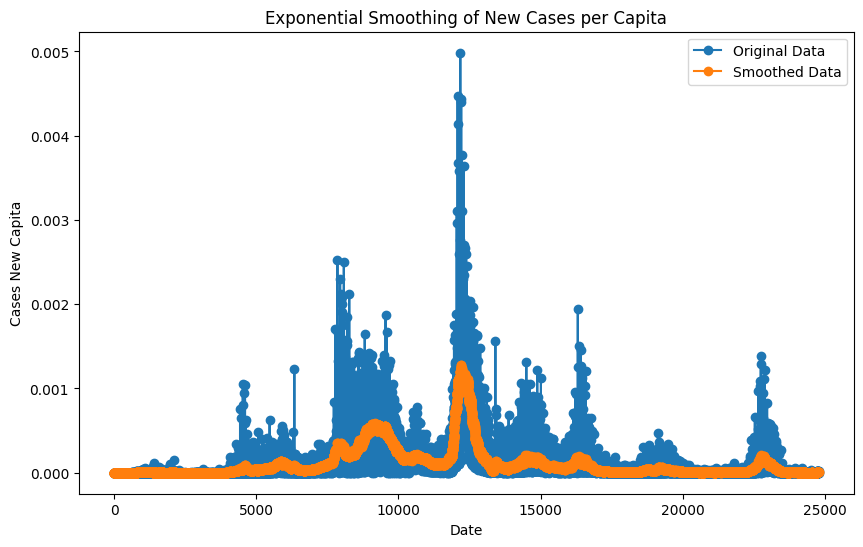

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cases_new_capita'], label='Original Data', marker='o')
plt.plot(df.index, df['smoothed_cases_new_capita'], label='Smoothed Data', marker='o')
plt.title('Exponential Smoothing of New Cases per Capita')
plt.xlabel('Date')
plt.ylabel('Cases New Capita')
plt.legend()
plt.show()